In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import string
from collections import Counter
import operator

def cleanSentence(sentence):
    sentence = sentence.split(' ')
    sentence = [word.strip(string.punctuation+string.whitespace) for word in sentence]
    sentence = [word for word in sentence if len(word) > 1 or (word.lower() == 'a' or word.lower() == 'i')]
    return sentence

def cleanInput(content):
    content = content.upper()
    content = re.sub('\n', ' ', content)
    content = bytes(content, 'UTF-8')
    content = content.decode('ascii', 'ignore')
    sentences = content.split('. ')
    return [cleanSentence(sentence) for sentence in sentences]

def getNgramsFromSentence(content, n):
    output = []
    for i in range(len(content)-n+1):
        output.append(content[i:i+n])
    return output

def getNgrams(content, n):
    content = cleanInput(content)
    ngrams = Counter()
    ngrams_list = []
    for sentence in content:
        newNgrams = [' '.join(ngram) for ngram in getNgramsFromSentence(sentence, n)]
        ngrams_list.extend(newNgrams)
        ngrams.update(newNgrams)
    return(ngrams)

In [ ]:
#загружаем текстовый файл
content = str(
      urlopen('https://downloader.disk.yandex.ru/disk/660b0603cbd137ee745cf7f99e9b1797acca6d54af3c0c840246213c574c822a/5cadf5d1/s5iioc04zFFofIXpScqFxefHRCNLSIeieeAj0ivDIo0ynJ9-wYcNt_xVmwNFqxacXZcRMmLpKTXD1kV0wK2AFw%3D%3D?uid=0&filename=inaugurationSpeech.txt&disposition=attachment&hash=Uq9mRoDQZeQUOB9O4HXXnckWKDS5ytk2BxsUtfyAMfO8inCPnQDVhLMSBCeuH7RJq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&fsize=49715&hid=01a9b18d40080f5c5df843a5ed1c400c&media_type=document&tknv=v2').read(),
              'utf-8')
ngrams = getNgrams(content, 3)

print(ngrams)

In [ ]:
#Создать словарь N-грамм #Исправить ошибки
from urllib.request import urlopen
fr~ bs4 i~port BeautifulSoup
import re
i~port string
i~port operator

def cleaninput(input):
input= re.sub('\n+', " ", input). lower()
input = re.sub('\[[0-9]*\]', "", input)
input= re.sub(' +', " ", input)
input = bytes(input, "UTF-B")
input = input.decode("ascii", "ignore")
cleaninput = []
input= input.split(' ')
for iteM in input:
iteM = iteM.strip(string.punctuation)
if len(iteM) > 1 or (iteM.lower() == 'a' or iteM.lower() '\'):
cleaninput.append(iteM)
return cleaninput
def ngraMs(input, n):
input = cleaninput(input)
output = {}
for i in range(len(input)-n+l):
ngraMTeMp =" ".join(input[i:i+n])
if ngraMTeMp not in output:
output[ngraMTeMp] = 0
output[ngraMTeMp] += 1
return output
                     
                     
#загружаем текстовый файл
content = str("Speech.txt").read(),
              'utf-8')
ngrams = getNgrams(content, 2)                     
sortedNGraMs = sorted(ngrams.items(), key= operator.itemgetter(1), reverse=True)           
print(sortedNGraMs)

In [ ]:
def isCommon(ngram):
    commonWords = ['THE', 'BE', 'AND', 'OF', 'A', 'IN', 'TO', 'HAVE', 'IT', 'I', 'THAT', 'FOR', 'YOU', 'HE', 'WITH', 'ON', 'DO', 'SAY', 'THIS', 'THEY', 'IS', 'AN', 'AT', 'BUT', 'WE', 'HIS', 'FROM', 'THAT', 'NOT', 'BY', 'SHE', 'OR', 'AS', 'WHAT', 'GO', 'THEIR', 'CAN', 'WHO', 'GET', 'IF', 'WOULD', 'HER', 'ALL', 'MY', 'MAKE', 'ABOUT', 'KNOW', 'WILL', 'AS', 'UP', 'ONE', 'TIME', 'HAS', 'BEEN', 'THERE', 'YEAR', 'SO', 'THINK', 'WHEN', 'WHICH', 'THEM', 'SOME', 'ME', 'PEOPLE', 'TAKE', 'OUT', 'INTO', 'JUST', 'SEE', 'HIM', 'YOUR', 'COME', 'COULD', 'NOW', 'THAN', 'LIKE', 'OTHER', 'HOW', 'THEN', 'ITS', 'OUR', 'TWO', 'MORE', 'THESE', 'WANT', 'WAY', 'LOOK', 'FIRST', 'ALSO', 'NEW', 'BECAUSE', 'DAY', 'MORE', 'USE', 'NO', 'MAN', 'FIND', 'HERE', 'THING', 'GIVE', 'MANY', 'WELL']
    for word in ngram:
        if word in commonWords:
            return True
    return False

def getNgramsFromSentence(content, n):
    output = []
    for i in range(len(content)-n+1):
        if not isCommon(content[i:i+n]):
            output.append(content[i:i+n])
    return output


In [ ]:
def getFirstSentenceContaining(ngram, content):
    #print(ngram)
    sentences = content.upper().split(". ")
    for sentence in sentences: 
        if ngram in sentence:
            return sentence+'\n'
    return ""


print(getFirstSentenceContaining('EXCLUSIVE METALLIC CURRENCY', content))
print(getFirstSentenceContaining('EXECUTIVE DEPARTMENT', content))
print(getFirstSentenceContaining('GENERAL GOVERNMENT', content))
print(getFirstSentenceContaining('CALLED UPON', content))
print(getFirstSentenceContaining('CHIEF MAGISTRATE', content))

### Марковские модели
Рисунок. Теоретический прогноз погоды на основе Марковской цепи

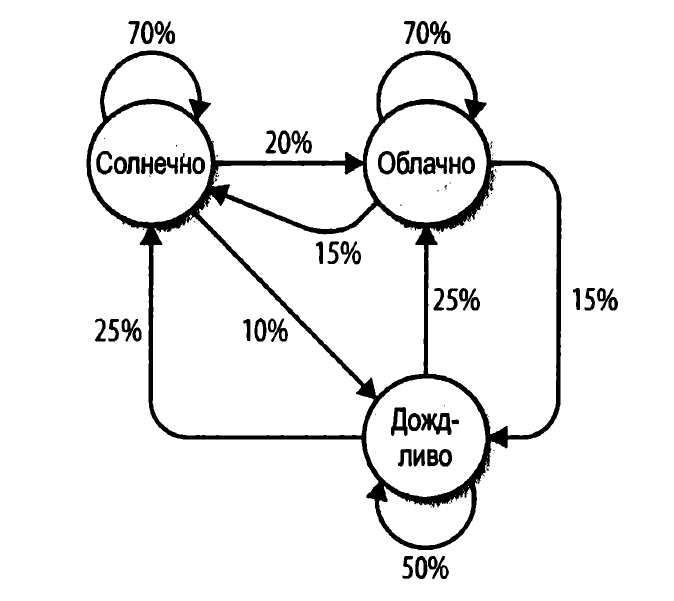

In [ ]:
from urllib.request import urlopen
from random import randint

def wordListSum(wordList):
    sum = 0
    for word, value in wordList.items():
        sum += value
    return sum

def retrieveRandomWord(wordList):
    randIndex = randint(1, wordListSum(wordList))
    for word, value in wordList.items():
        randIndex -= value
        if randIndex <= 0:
            return word

def buildWordDict(text):
    # Remove newlines and quotes
    text = text.replace('\n', ' ');
    text = text.replace('"', '');

    # Make sure punctuation marks are treated as their own "words,"
    # so that they will be included in the Markov chain
    punctuation = [',','.',';',':']
    for symbol in punctuation:
        text = text.replace(symbol, ' {} '.format(symbol));

    words = text.split(' ')
    # Filter out empty words
    words = [word for word in words if word != '']

    wordDict = {}
    for i in range(1, len(words)):
        if words[i-1] not in wordDict:
                # Create a new dictionary for this word
            wordDict[words[i-1]] = {}
        if words[i] not in wordDict[words[i-1]]:
            wordDict[words[i-1]][words[i]] = 0
        wordDict[words[i-1]][words[i]] += 1
    return wordDict

text = str(urlopen('https://downloader.disk.yandex.ru/disk/660b0603cbd137ee745cf7f99e9b1797acca6d54af3c0c840246213c574c822a/5cadf5d1/s5iioc04zFFofIXpScqFxefHRCNLSIeieeAj0ivDIo0ynJ9-wYcNt_xVmwNFqxacXZcRMmLpKTXD1kV0wK2AFw%3D%3D?uid=0&filename=inaugurationSpeech.txt&disposition=attachment&hash=Uq9mRoDQZeQUOB9O4HXXnckWKDS5ytk2BxsUtfyAMfO8inCPnQDVhLMSBCeuH7RJq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=text%2Fplain&fsize=49715&hid=01a9b18d40080f5c5df843a5ed1c400c&media_type=document&tknv=v2')
          .read(), 'utf-8')
wordDict = buildWordDict(text)

#Генерируем цепь Маркова длиной 100
length = 100
chain = ['I']
for i in range(0, length):
    newWord = retrieveRandomWord(wordDict[chain[-1]])
    chain.append(newWord)

print(' '.join(chain))

## Natural Language Toolkit (NLTK)

In [ ]:
import nltk
nltk.download()